EECS 731 - Movie Clustering

As always we want to get our data and take a look at it...

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
# read rating data
rating = pd.read_csv("../data/raw/ratings.csv")
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [3]:
# read movie data
movie = pd.read_csv("../data/raw/movies.csv")
movie = movie.loc[:,["movieId","title"]]
movie.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [4]:
# merge the two dataframes
data = pd.merge(movie,rating)
data.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
5,1,Toy Story (1995),18,3.5
6,1,Toy Story (1995),19,4.0
7,1,Toy Story (1995),21,3.5
8,1,Toy Story (1995),27,3.0
9,1,Toy Story (1995),31,5.0


In [5]:
# cut down dataset in order to support a faster seaborn heatmap
data = data.iloc[:10000,:]

In [6]:
# Refactor things into a pivot table
# I saw some users online use this approach to look at how users rated every movie on the list

pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)",Amateur (1994),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),...,"War, The (1994)",Waterworld (1995),What's Eating Gilbert Grape (1993),When Night Is Falling (1995),While You Were Sleeping (1995),"White Balloon, The (Badkonake sefid) (1995)",White Man's Burden (1995),White Squall (1996),Wild Bill (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,2.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,4.0,3.0,5.0,NaN,4.0,NaN,3.0,5.0,4.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Look at the general correlations between movies

similarity_with_other_movies = pivot_table.corr(method='pearson', min_periods=1)
similarity_with_other_movies.head(10)

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)",Amateur (1994),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),...,"War, The (1994)",Waterworld (1995),What's Eating Gilbert Grape (1993),When Night Is Falling (1995),While You Were Sleeping (1995),"White Balloon, The (Badkonake sefid) (1995)",White Man's Burden (1995),White Squall (1996),Wild Bill (1995),"Young Poisoner's Handbook, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: Pet Detective (1994),1.000000,0.721721,NaN,0.032299,NaN,-1.0,0.115275,NaN,-1.0,1.000000,...,-0.507093,0.176155,-0.049690,NaN,0.038039,NaN,-0.654654,0.050847,0.500000,NaN
Ace Ventura: When Nature Calls (1995),0.721721,1.000000,NaN,0.166127,NaN,NaN,0.127663,NaN,NaN,NaN,...,-0.866025,0.323291,-0.253460,NaN,-0.066700,NaN,-1.000000,-0.662541,-1.000000,NaN
"Addiction, The (1995)",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.032299,0.166127,NaN,1.000000,NaN,NaN,-0.208240,NaN,NaN,0.981981,...,NaN,-0.077580,0.474036,NaN,0.165054,NaN,1.000000,NaN,1.000000,NaN
Amateur (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Amazing Panda Adventure, The (1995)",-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN
"American President, The (1995)",0.115275,0.127663,NaN,-0.208240,NaN,NaN,1.000000,NaN,NaN,NaN,...,-0.333333,0.099971,-0.209054,NaN,-0.085816,NaN,0.953821,0.213201,0.594089,NaN
Angels and Insects (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.301511,NaN,NaN,NaN,NaN,NaN
Anne Frank Remembered (1995),-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,...,NaN,NaN,-1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


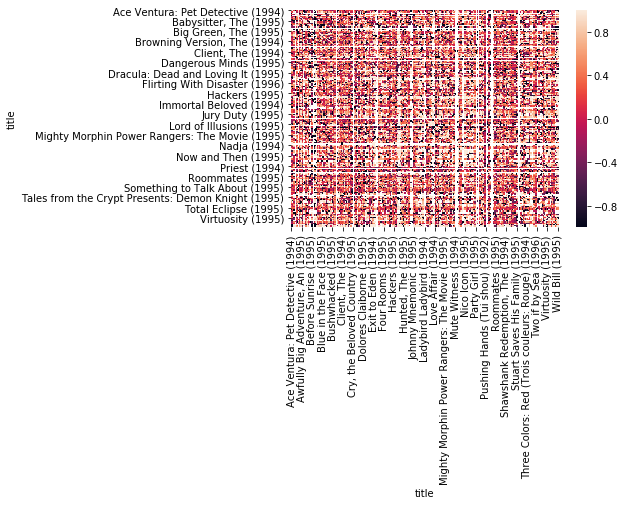

In [14]:
# create a heatmap of this correlation to see similar and dissimilar movies at a glance
import seaborn as sns
sns.heatmap(similarity_with_other_movies)
# xticklabels=similarity_with_other_movies.columns.values,
# yticklabels=similarity_with_other_movies.columns.values

The above graph displays a heatmap based on similarity of movies to one another. Light colors represent movies with exact correlation, whereas darker colors represent movies that are very dissimilar. To make this a little easier to understand, the process could be repeated with a smaller portion of the dataset.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['title'])
data['title'] = le.transform(data['title'])

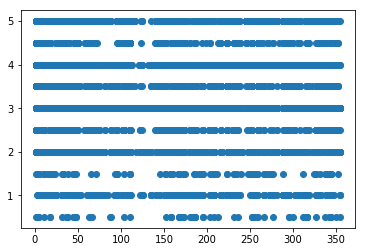

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['movieId'],data['rating'])

In [11]:
from sklearn.cluster import KMeans
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data, 3)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

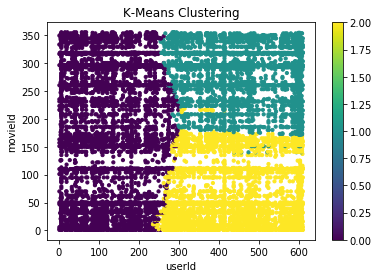

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['userId'],data['movieId'],
                     c=kmeans[0],s=10)
ax.set_title('K-Means Clustering')
ax.set_xlabel('userId')
ax.set_ylabel('movieId')
plt.colorbar(scatter)

The above graph shows userID vs rating, where the colors represent the K-means clustering of movies. I 